In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np


In [2]:
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [3]:
query= '''
select * from `celtic-music-240111.dbt_Celia_Analytics.fb_event_aOS_US_BR_3rddays`
where mp_country="US"
'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:01:02.561342


In [5]:
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #impor

In [6]:
raw_data.shape

(90487, 117)

##FT

In [7]:
CFt=raw_data[raw_data.y=="Premium"].days_to_take_FT.value_counts() #Ft_Converted


In [8]:
raw_data[raw_data.days_to_take_FT<=7].days_to_take_FT.hist()

In [9]:
didCFt= raw_data[raw_data.y=="Freemium"].days_to_take_FT.value_counts() 
# FT_didn't-Converted
print(didCFt)

0.0      1161
1.0        11
2.0         6
9.0         4
3.0         4
17.0        4
7.0         4
109.0       3
6.0         3
5.0         3
34.0        3
12.0        3
4.0         3
26.0        2
31.0        2
18.0        2
8.0         2
35.0        2
25.0        2
45.0        2
14.0        2
140.0       2
23.0        2
89.0        2
24.0        2
20.0        1
102.0       1
230.0       1
22.0        1
10.0        1
         ... 
142.0       1
99.0        1
13.0        1
53.0        1
15.0        1
111.0       1
70.0        1
21.0        1
157.0       1
98.0        1
11.0        1
94.0        1
38.0        1
180.0       1
100.0       1
77.0        1
50.0        1
217.0       1
28.0        1
92.0        1
37.0        1
124.0       1
44.0        1
51.0        1
149.0       1
112.0       1
36.0        1
108.0       1
184.0       1
105.0       1
Name: days_to_take_FT, Length: 72, dtype: int64


In [10]:
2606/(3077+2606)  #Percentage of people who take Ft and convert

0.45856061939116666

# Days_to_convert

In [11]:
raw_data.y.value_counts()

Freemium    87716
Premium      2771
Name: y, dtype: int64

In [12]:
ConvD=raw_data[raw_data.y=="Premium"].days_to_convert.value_counts() #Converted
print(ConvD)

7.0      1071
0.0       425
8.0       133
9.0       106
1.0        78
2.0        54
3.0        51
10.0       47
5.0        33
4.0        32
6.0        31
13.0       26
14.0       25
11.0       23
12.0       23
24.0       18
20.0       18
16.0       17
17.0       17
25.0       16
18.0       15
43.0       14
19.0       13
21.0       13
15.0       12
28.0       11
26.0       10
37.0       10
27.0        9
22.0        9
         ... 
109.0       1
112.0       1
160.0       1
172.0       1
170.0       1
150.0       1
198.0       1
134.0       1
73.0        1
205.0       1
130.0       1
145.0       1
189.0       1
139.0       1
48.0        1
188.0       1
184.0       1
60.0        1
80.0        1
137.0       1
175.0       1
195.0       1
138.0       1
151.0       1
74.0        1
124.0       1
89.0        1
204.0       1
178.0       1
201.0       1
Name: days_to_convert, Length: 170, dtype: int64


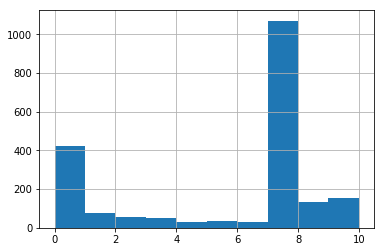

In [13]:
raw_data[raw_data.days_to_convert<=10].days_to_convert.hist()

In [14]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [15]:
gf=raw_data[columns]

In [16]:
print(gf['y'].value_counts())
Premium_count = len(gf[gf['y']=="Premium"])
Freemium_count  = len(gf[gf['y']=="Freemium"])
pct_of_Premium = Premium_count/(Premium_count+Freemium_count)
print("Percentage of Premium", pct_of_Premium*100)
pct_of_Freemium= Freemium_count/(Premium_count+Freemium_count)
print("Percentage of Freemium", pct_of_Freemium *100)

Freemium    87716
Premium      2771
Name: y, dtype: int64
Percentage of Premium 3.062318344071524
Percentage of Freemium 96.93768165592847


In [17]:
p_mean= gf.groupby('y').mean().T

In [18]:
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()


In [19]:
p_mean['Freemium'].values

array([5.30134336e+06, 4.33437256e+00, 1.86438140e+03, 9.89387216e+02,
       9.29773359e-01, 1.46267500e-02, 5.83929956e-02, 2.61285284e+00,
       2.39409002e-04, 1.05453965e-02, 3.71699576e-01, 2.01371472e+00,
       9.22750695e-02, 8.76966574e-01, 3.83054403e-03, 3.23772174e-03,
       1.00080943e+00, 1.00070683e+00, 1.15232113e+00, 1.27228784e-02,
       1.06981623e-01, 4.34778148e-01, 6.15645948e-01, 8.99744630e-01,
       1.75739888e+00, 1.17185006e-01, 7.64729354e-01, 3.92003739e-01,
       1.16375576e-01, 3.84365452e+00, 3.09248028e-01, 3.14138812e-01,
       5.02530895e-02, 7.87883624e-02, 6.28847645e-02, 5.79597793e-02,
       9.88211957e-01, 1.04883944e-02, 5.58621004e-03, 1.30888321e-01,
       8.75131105e-01, 2.22547768e-01, 3.57905057e-01, 1.01361211e-01,
       1.82406858e-04, 8.99220211e-01, 1.14118291e-02, 5.56340918e-03,
       4.62857403e-02, 6.45264262e-03, 9.62412787e-01, 9.32555064e-03,
       4.25965616e-01, 1.34981075e-02, 3.53413288e-04, 9.46235578e-04,
      

In [20]:
p_mean['Premium'].values

array([5.62010356e+06, 3.05712319e+00, 2.04971851e+03, 1.08146734e+03,
       9.98917358e-01, 5.24359437e-01, 4.67340310e-01, 5.18152292e+00,
       3.60880549e-04, 4.36665464e-02, 7.23926380e-01, 1.96282930e+00,
       9.96030314e-02, 8.53121617e-01, 1.69613858e-02, 4.33056658e-03,
       1.00577409e+00, 1.00541321e+00, 1.22121978e+00, 1.55178636e-02,
       1.30638759e-01, 2.94478528e-01, 1.54168170e+00, 1.02526164e+00,
       1.71923493e+00, 8.94983760e-02, 9.29267412e-01, 3.50775893e-01,
       9.38289426e-02, 6.48971490e+00, 6.82425117e-01, 7.54240346e-01,
       7.07325875e-02, 8.55286900e-02, 6.31540960e-02, 5.30494406e-02,
       2.33092746e+00, 1.40382533e-01, 3.01335258e-01, 1.49693252e+00,
       4.54240346e+00, 7.67592927e-01, 1.57704800e+00, 7.26452544e-01,
       3.24792494e-03, 4.84409960e+00, 2.95922050e-02, 3.39227716e-02,
       3.73150487e-01, 5.12450379e-02, 1.40996030e+00, 2.92313244e-02,
       3.97546012e+00, 4.87910502e-01, 2.38181162e-02, 5.59364850e-02,
      

In [21]:
p_mean.index

Index(['user_id', 'days_to_take_FT', 'screen_height', 'screenwidth',
       'initial_assessment_completed', 'FT_start', 'Video_Completed',
       'OpenApp', 'LogOut', 'S_DAPNewSkills', 'AB_TEST', 'S_SPHome',
       'S_SPLogin', 'LogIn', 'SPForgotPass', 'S_SPSignup', 'SignUp',
       'OBCreateUser', 'S_OBBabyName', 'OBCreateTwins', 'S_OBPremature',
       'Paywall_Dismiss', 'S_Paywall_Soft', 'CreateBaby', 'S_IAIntro',
       'IAStraightToActivities', 'IAStartAssessment', 'IASkipAssessment',
       'MasterSkill', 'IAFinishSkill', 'S_HealthInterest',
       'IAFinishAssessment', 'S_IASetReminder', 'S_IAReminderSet',
       'S_IAReminderContinue', 'IAReminder', 'S_IA_Answer_Skill',
       'DAPChangeActivity', 'S_DAPPastPlansPremium', 'DAPActivityCompleted',
       'DAPFullScreenActivity', 'S_DAPMaterials', 'MilestonesUpdate',
       'ArticleView', 'SlideshowView', 'ActivityView', 'ClickInDAP',
       'RateActivityDAP', 'Feedback_RateActivity',
       'Dismiss_Feedback_RateActivity', 'LifeS

In [22]:
numerics=list(p_mean.index)
numerics

['user_id',
 'days_to_take_FT',
 'screen_height',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'CreateBaby',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'IAFinishAssessment',
 'S_IASetReminder',
 'S_IAReminderSet',
 'S_IAReminderContinue',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'DAPFullScreenActivity',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'FreeTria

# Correlations



In [23]:
numerics.append('y')

In [24]:
numerics= raw_data[numerics]

In [25]:
cleanup_nums = {"y":{'Premium':1, 'Freemium':0}}

In [26]:
numerics.replace(cleanup_nums, inplace=True)

In [27]:
correlation = numerics.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [28]:
correlation=correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool)) # convert lower triangle of values to NaNs

In [29]:
correlations= correlation.stack().reset_index()
correlations.columns=['V1','V2','Corr']



In [30]:
correlations.loc[correlations['Corr']>.70].reset_index() #variables to remove given the positive correlation to avoid collinearity



index                            V1                    V2      Corr
0    172                 screen_height           screenwidth  0.969310
1    359  initial_assessment_completed            CreateBaby  0.715239
2    471                      FT_start        FreeTrialStart  0.956231
3   2174              S_HealthInterest    IAFinishAssessment  0.839905
4   2342               S_IAReminderSet  S_IAReminderContinue  0.822506
5   2343               S_IAReminderSet            IAReminder  0.936258
6   2396          S_IAReminderContinue            IAReminder  0.807527
7   2703         DAPFullScreenActivity          ActivityView  0.982834
8   3693                    S_CATSkill      S_CollectionView  0.982512

In [31]:
correlations.loc[correlations['Corr']<-.70].reset_index() #variables to remove given the negative correlation to avoid collinearity



Empty DataFrame
Columns: [index, V1, V2, Corr]
Index: []

In [32]:
to_keep = list(numerics.columns)
not_keep=['screen_height','CreateBaby','FreeTrialStart','IAFinishAssessment','S_IAReminderContinue','S_IAReminderSet','DAPFullScreenActivity','S_CATSkill']
for element in not_keep:
    if element in to_keep:
        to_keep.remove(element)
to_keep

['user_id',
 'days_to_take_FT',
 'screenwidth',
 'initial_assessment_completed',
 'FT_start',
 'Video_Completed',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberStats',
 'MenuFamilyInvite',
 'MenuChangeBi

In [33]:
for i in to_keep:
    print(i)

user_id
days_to_take_FT
screenwidth
initial_assessment_completed
FT_start
Video_Completed
OpenApp
LogOut
S_DAPNewSkills
AB_TEST
S_SPHome
S_SPLogin
LogIn
SPForgotPass
S_SPSignup
SignUp
OBCreateUser
S_OBBabyName
OBCreateTwins
S_OBPremature
Paywall_Dismiss
S_Paywall_Soft
S_IAIntro
IAStraightToActivities
IAStartAssessment
IASkipAssessment
MasterSkill
IAFinishSkill
S_HealthInterest
S_IASetReminder
IAReminder
S_IA_Answer_Skill
DAPChangeActivity
S_DAPPastPlansPremium
DAPActivityCompleted
S_DAPMaterials
MilestonesUpdate
ArticleView
SlideshowView
ActivityView
ClickInDAP
RateActivityDAP
Feedback_RateActivity
Dismiss_Feedback_RateActivity
LifeSpent
WhatchAd
VideoPlayerActivity
NPSSubmit
S_NPSScore
S_ProgressHome
S_MenuFamilyHome
MenuHelp
MenuMemberStats
MenuFamilyInvite
MenuChangeBirthday
S_MenuEditBaby
S_MenuUserProfile
MenuFamilyDefault
S_MenuFamilyProfile
TAPCallToAction
S_PremiumProcess
RestorePurchase
S_CATHome_P
S_CATHome_F
CATSearch
S_CATViewSkill
S_CollectionView
ViewAllCollections
S_Sear